Aqui está um código simples com sklearn para testar a execução de Python no Codespace com uma Decision Tree:

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Treinar a Decision Tree
clf.fit(X_train, y_train)

# Prever as classes para o conjunto de teste
y_pred = clf.predict(X_test)

# Imprimir a precisão da Decision Tree
print("Precisão:", clf.score(X_test, y_test))

Precisão: 1.0


In [8]:
# EXERCÍCIO 1

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(np.int64)

# Definir os diferentes valores de test_size para serem testados
test_sizes = [0.2]

# Definir uma gama mais ampla de parâmetros para grid search
param_grid = {
    'max_depth': [9, 12, 15],   # Focando em valores até 15
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [5, 7, 15]
}

# Loop para testar diferentes tamanhos de test_size
for test_size in test_sizes:
    print(f"Testando com test_size={test_size}")
    
    # Dividir o dataset em treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Criar o modelo de árvore de decisão
    clf = DecisionTreeClassifier(random_state=42)
    
    # Configurar o GridSearchCV
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    
    # Treinar o modelo com grid search
    grid_search.fit(X_train, y_train)
    
    # Melhor combinação de parâmetros
    print("Melhores parâmetros:", grid_search.best_params_)
    
    # Exibir os resultados detalhados de cada combinação de parâmetros testada
    for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
        print(f"Parâmetros: {params} - Precisão média: {mean_score:.4f}")
    
    # Prever as classes para o conjunto de teste com o melhor modelo
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    # Imprimir a precisão do melhor modelo
    print(f"Precisão com test_size={test_size}:", accuracy_score(y_test, y_pred))
    print("-" * 50)


Testando com test_size=0.2
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=3; total time=   6.7s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=3; total time=   6.8s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=3; total time=   6.8s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=3; total time=   6.9s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=3; total time=   6.7s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=4; total time=   6.7s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=4; total time=   6.8s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=4; total time=   6.9s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=4; total time=   6.7s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=5; total time=   6.8s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=4; total time=   6.9s
[CV] END 

In [9]:
#TESTANDO NOVOS PARAMETROS DE FORMA OTIMIZADA

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'max_depth': [12, 15],
    'min_samples_split': [3, 4],
    'min_samples_leaf': [2, 5],
    'min_impurity_decrease': [0.0, 0.001],
    'max_features': [None, 'sqrt']
}

random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=5,  # Menos iterações para acelerar
    cv=3,  # Reduzir o número de folds
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

# Melhores parâmetros encontrados
print("Melhores parâmetros:", random_search.best_params_)

# Prever no conjunto de teste
y_pred = random_search.best_estimator_.predict(X_test)

# Imprimir a precisão
print(f"Precisão com test_size={test_size}:", accuracy_score(y_test, y_pred))



Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END max_depth=12, max_features=sqrt, min_impurity_decrease=0.001, min_samples_leaf=5, min_samples_split=4; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_impurity_decrease=0.001, min_samples_leaf=2, min_samples_split=4; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_impurity_decrease=0.001, min_samples_leaf=2, min_samples_split=4; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_impurity_decrease=0.001, min_samples_leaf=2, min_samples_split=4; total time=   0.4s
[CV] END max_depth=12, max_features=sqrt, min_impurity_decrease=0.001, min_samples_leaf=5, min_samples_split=4; total time=   0.4s
[CV] END max_depth=12, max_features=sqrt, min_impurity_decrease=0.001, min_samples_leaf=5, min_samples_split=4; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=3; total time=   0.6s
[CV] END max_depth=15, ma

In [14]:
# EXERCÍCIO 2

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Carregar o conjunto de dados MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(np.int64)

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
clf = DecisionTreeClassifier(min_samples_split=4, min_samples_leaf=2, \
                             min_impurity_decrease=0.0, max_features=None, max_depth=15, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print("Precisão Decision Tree:", dt_accuracy)

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Precisão Random Forest:", rf_accuracy)

# XGBoost
xgb_clf = xgb.XGBClassifier(max_depth=10, n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("Precisão XGBoost:", xgb_accuracy)


Precisão Decision Tree: 0.8750714285714286
Precisão Random Forest: 0.9439285714285715


/home/codespace/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:12:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Precisão XGBoost: 0.974


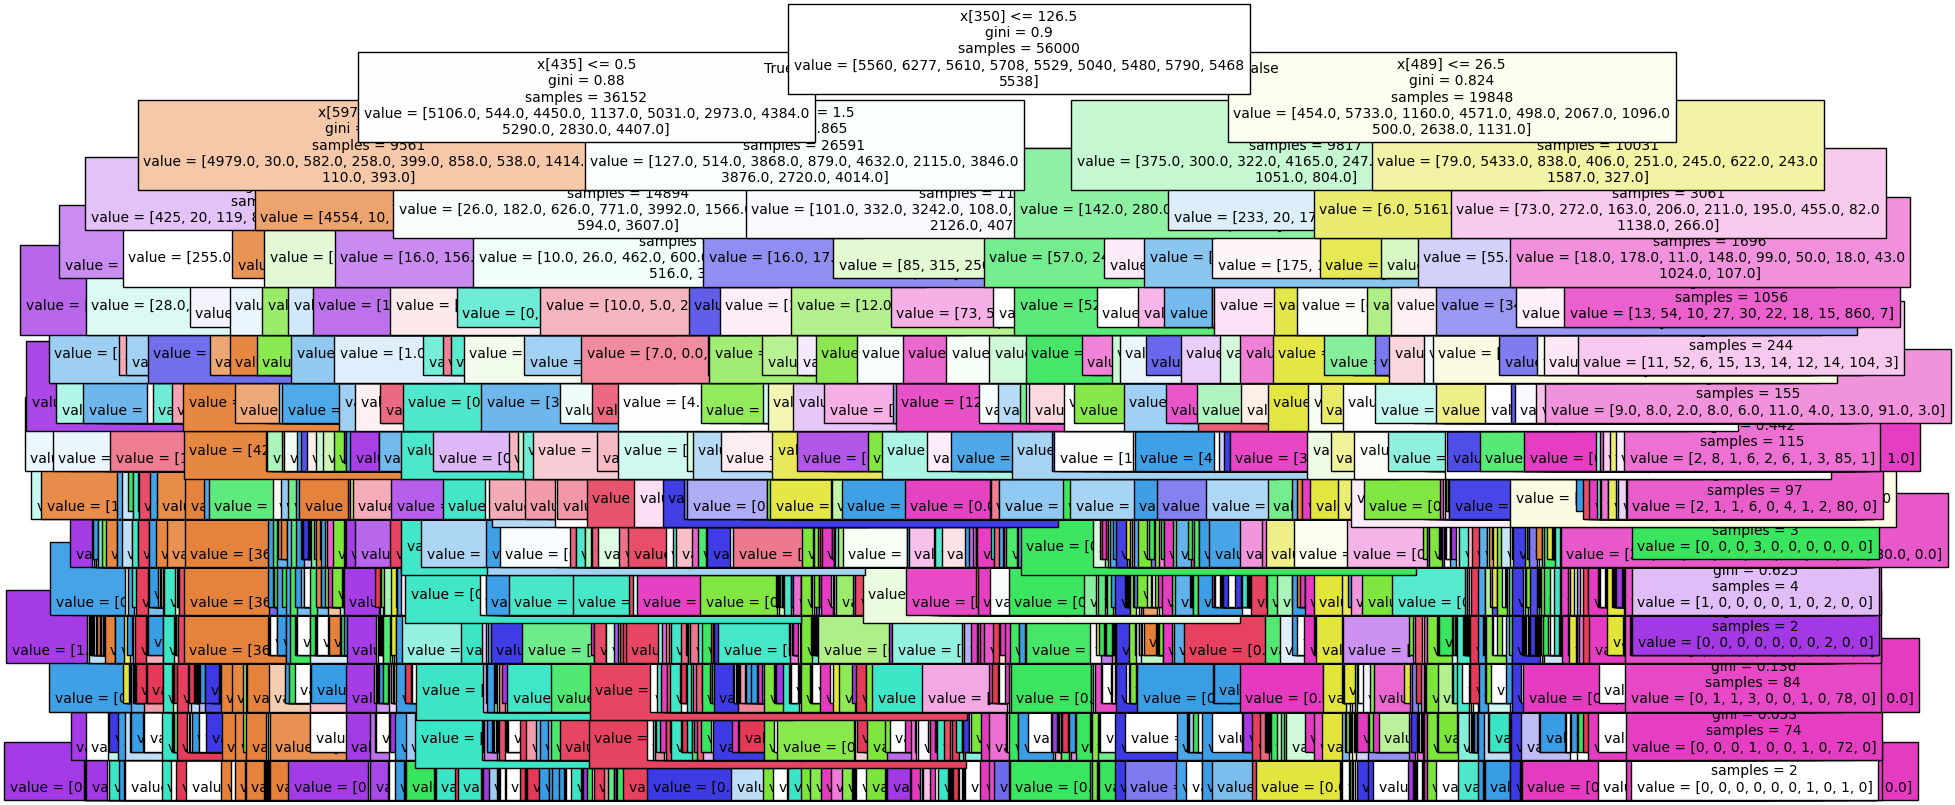

In [16]:
# EXERCÍCIO 3
# Visualização da Árvore de Decisão

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Plotar a árvore de decisão
plt.figure(figsize=(20,10))  # Ajuste o tamanho da figura conforme necessário
plot_tree(clf, filled=True, fontsize=10)
plt.show()

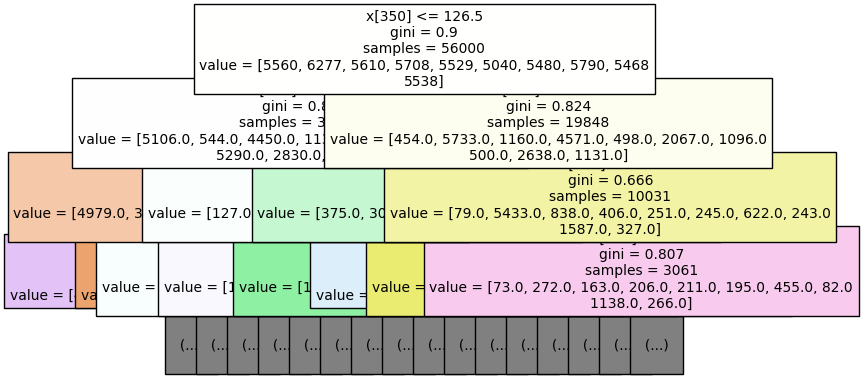

In [17]:
#EXIBINDO A ÁRVORES PARCIALMENTE PARA MELHORAR A VISUALIZAÇÃO

plot_tree(clf, max_depth=3, filled=True, fontsize=10)
plt.show()


In [22]:
# EXERCICIO 3 CONTINUACAO
# Cálculo da Medida de Impureza para Diferentes Conjuntos

from sklearn.metrics import log_loss

# Função para calcular o índice de Gini
def gini(y):
    m = len(y)
    return 1 - sum([(sum(y == c) / m) ** 2 for c in np.unique(y)])

# Função para calcular a entropia
def entropy(y):
    m = len(y)
    p = [sum(y == c) / m for c in np.unique(y)]
    return -sum([p[i] * np.log2(p[i] + 1e-9) for i in range(len(p))])

# Cálculo da impureza em um nó específico
gini_impurity = gini(y_train)
entropy_impurity = entropy(y_train)

print(f"Gini: {gini_impurity}")
print(f"Entropia: {entropy_impurity}")


Gini: 0.8997250950255102
Entropia: 3.3199602699058155


Precisão Decision Tree Ajustada: 0.7057857142857142
Gini: 0.8997250950255102
Entropia: 3.3199602699058155


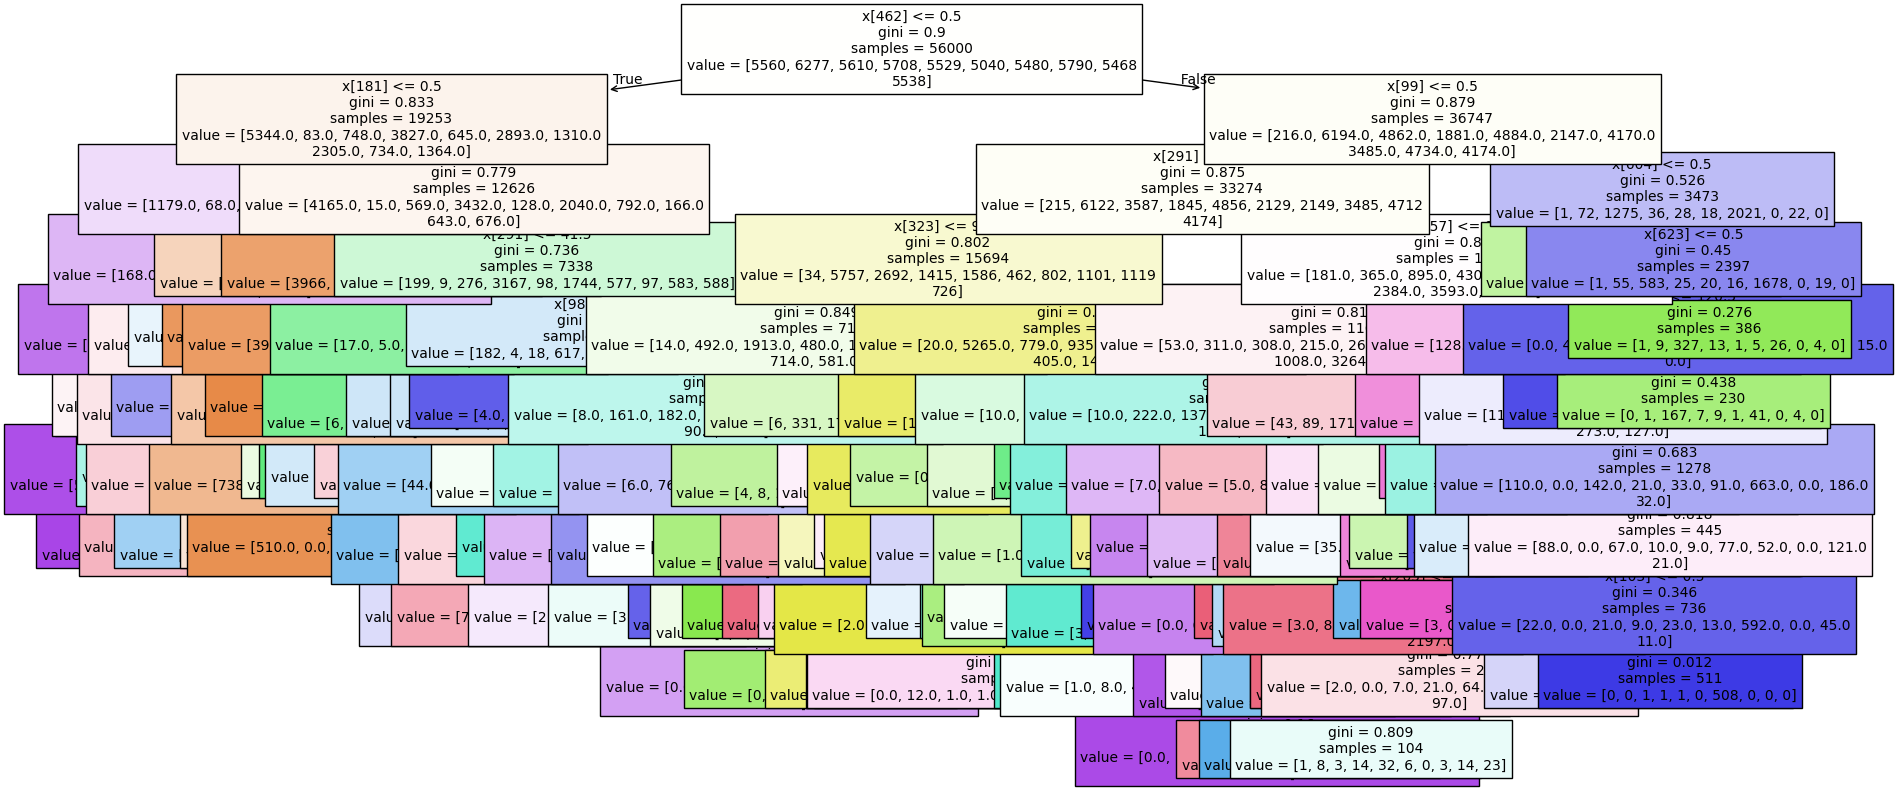

In [23]:
# APOS AVALIAR GINI E ENTROPIA DECIDI AJUSTAR OS PARAMETROS

# Decision Tree Ajustada
clf = DecisionTreeClassifier(
    min_samples_split=10,        # Aumentar para reduzir overfitting
    min_samples_leaf=5,          # Aumentar para evitar folhas com poucas amostras
    min_impurity_decrease=0.001, # Impedir divisões irrelevantes
    max_features='sqrt',         # Considerar apenas sqrt(n) features em cada split
    max_depth=12,                # Reduzir a profundidade máxima da árvore
    random_state=42
)

# Treinar e avaliar a árvore de decisão ajustada
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print("Precisão Decision Tree Ajustada:", dt_accuracy)

from sklearn.metrics import log_loss

# Função para calcular o índice de Gini
def gini(y):
    m = len(y)
    return 1 - sum([(sum(y == c) / m) ** 2 for c in np.unique(y)])

# Função para calcular a entropia
def entropy(y):
    m = len(y)
    p = [sum(y == c) / m for c in np.unique(y)]
    return -sum([p[i] * np.log2(p[i] + 1e-9) for i in range(len(p))])

# Cálculo da impureza em um nó específico
gini_impurity = gini(y_train)
entropy_impurity = entropy(y_train)

print(f"Gini: {gini_impurity}")
print(f"Entropia: {entropy_impurity}")

# Visualização da Árvore de Decisão

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Plotar a árvore de decisão
plt.figure(figsize=(20,10))  # Ajuste o tamanho da figura conforme necessário
plot_tree(clf, filled=True, fontsize=10)
plt.show()